# Data exploration:-

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.linear_model import LinearRegression
from google.colab import drive
drive.mount('/content/drive')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

df = pd.read_csv('/content/drive/MyDrive/Dataset/Supply_Chain_Dataset_New.csv', encoding='latin1', engine='python')


Mounted at /content/drive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

# Pre process:-

In [ ]:
# change object data into int or float

hist_data = df.copy(deep=False)

from sklearn.preprocessing import LabelEncoder
def Change_obj_type(data):
    for column in data.columns:
        if df[column].dtype == type(object):
            le = LabelEncoder()
            df[column] = le.fit_transform(df[column])
    return df
new_data = Change_obj_type(hist_data)
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  int64  
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  int64  
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  int64  
 9   Customer City                  180519 non-null  int64  
 10  Customer Country               180519 non-null  int64  
 11  Customer Email                 180519 non-null  int64  
 12  Customer Fname                

**Remove outliers:**

In [ ]:
#check for outliers Benefit per order

# Assuming your dataset has a column 'X' with numerical values
data_column = 'Benefit per order'

# Calculate the IQR (Interquartile Range)
Q1 = new_data[data_column].quantile(0.25)
Q3 = new_data[data_column].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = new_data[(new_data[data_column] < lower_bound) | (new_data[data_column] > upper_bound)]


In [ ]:
#check for outliers Sales per customer

# Assuming your dataset has a column 'X' with numerical values
data_column2 = 'Sales per customer'

# Calculate the IQR (Interquartile Range)
Q12 = new_data[data_column2].quantile(0.25)
Q32 = new_data[data_column2].quantile(0.75)
IQR2 = Q32 - Q12

# Define the upper and lower bounds to identify outliers
lower_bound2 = Q12 - 1.5 * IQR2
upper_bound2 = Q32 + 1.5 * IQR2

# Identify outliers
outliers2 = new_data[(new_data[data_column2] < lower_bound2) | (new_data[data_column2] > upper_bound2)]


In [ ]:
# Remove outliers bpo
df_no_outliers = new_data[(new_data[data_column] >= lower_bound) & (new_data[data_column] <= upper_bound)]

# Remove outliers oid
df_no_outliers2 = df_no_outliers[(df_no_outliers[data_column2] >= lower_bound2) & (df_no_outliers[data_column2] <= upper_bound2)]


# Model train:-

**Features:Benefits per order,sales per customer**

1)Use Elbow method for select best k:

( VarianceThreshold is used to remove features with zero variance.The goal is to choose features that contribute the most to the clustering process.)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

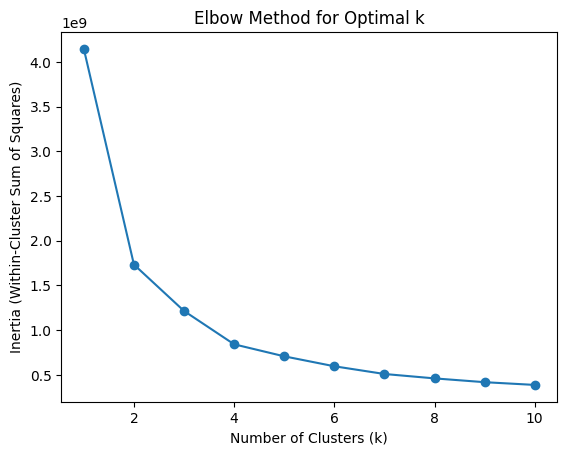

Optimal Number of Clusters (k): 10


In [ ]:
from sklearn.cluster import KMeans

# Assuming your dataset has numerical features you want to use for clustering
X = df_no_outliers2[['Benefit per order', 'Sales per customer', 'Category Name','Product Name','Product Price','Product Status']]  # Adjust features based on your dataset

# Calculate inertia for different values of k
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k')
plt.show()

# Find the optimal number of clusters (k)
optimal_k = inertia.index(min(inertia)) + 1
print(f'Optimal Number of Clusters (k): {optimal_k}')

In [ ]:
# Get the names of the features before applying VarianceThreshold
feature_names = X.columns

# Apply VarianceThreshold to select features with non-zero variance
selector = VarianceThreshold()
X_selected = selector.fit_transform(X)

# Get the names of the selected features
selected_feature_names = feature_names[selector.get_support()]

kmeans = KMeans(n_clusters=10, random_state=42)

# Fit the k-means model to the selected features
kmeans.fit(X_selected)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Visualize the clusters
plt.scatter(X_selected[:, 0], X_selected[:, 1], c=labels, cmap='viridis', edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.title('K-Means Clustering with Feature Selection')
plt.xlabel(f'{selected_feature_names[0]}')
plt.ylabel(f'{selected_feature_names[1]}')
plt.show()

2)Normal k means with k=3:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


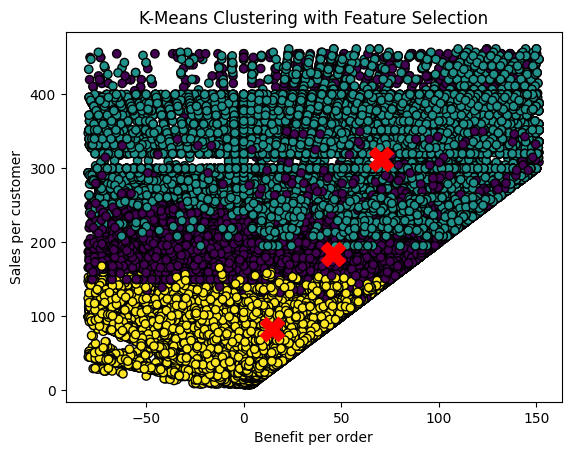

In [ ]:
# Get the names of the features before applying VarianceThreshold
feature_names = X.columns

# Apply VarianceThreshold to select features with non-zero variance
selector = VarianceThreshold()
X_selected = selector.fit_transform(X)

# Get the names of the selected features
selected_feature_names = feature_names[selector.get_support()]

kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the k-means model to the selected features
kmeans.fit(X_selected)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Visualize the clusters
plt.scatter(X_selected[:, 0], X_selected[:, 1], c=labels, cmap='viridis', edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.title('K-Means Clustering with Feature Selection')
plt.xlabel(f'{selected_feature_names[0]}')
plt.ylabel(f'{selected_feature_names[1]}')
plt.show()

**Features:Benefits per order,Product Price**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


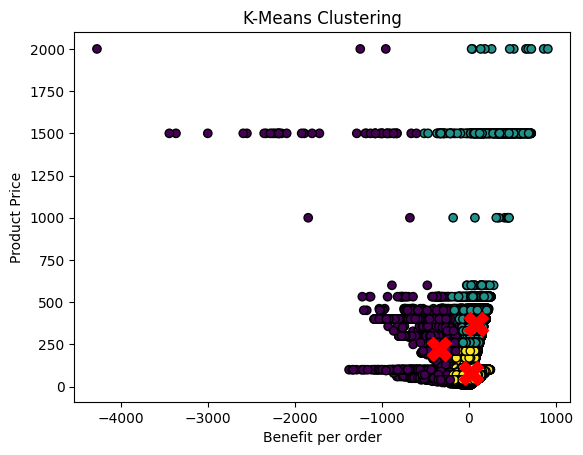

In [ ]:
from sklearn.cluster import KMeans

# Assuming your dataset has features you want to use for clustering
X = new_data[['Benefit per order', 'Product Price']]  # Adjust features based on your dataset

# Assuming you want to find 3 clusters (you can adjust the number of clusters)
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the k-means model to the data
kmeans.fit(X)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Visualize the clusters
plt.scatter(X['Benefit per order'], X['Product Price'], c=labels, cmap='viridis', edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.title('K-Means Clustering')
plt.xlabel('Benefit per order')
plt.ylabel('Product Price')
plt.show()


**Features:Benefits per order,Order Item Total**

(Before remove outliers)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


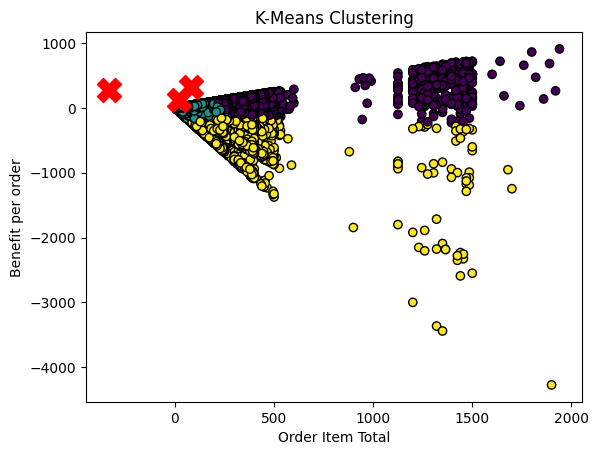

In [ ]:
from sklearn.cluster import KMeans

# Assuming your dataset has features you want to use for clustering
X = new_data[['Benefit per order', 'Order Item Total']]  # Adjust features based on your dataset

# Assuming you want to find 3 clusters (you can adjust the number of clusters)
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the k-means model to the data
kmeans.fit(X)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Visualize the clusters
plt.scatter(X['Order Item Total'], X['Benefit per order'], c=labels, cmap='viridis', edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.title('K-Means Clustering')
plt.ylabel('Benefit per order')
plt.xlabel('Order Item Total')
plt.show()
